In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from win32com.shell import shell, shellcon
userdocpath = shell.SHGetFolderPath(0, shellcon.CSIDL_PERSONAL , None, 0)
userpicpath = shell.SHGetFolderPath(0, shellcon.CSIDL_MYPICTURES , None, 0)
# userdocpath is windows path variable to "MyDocuments"
# userpicpath is windows path variable to "MyPictures"
#N.B. UNZIP THE DATA FILE IN MyDocuments to create MyDocuments\GNADATA\minicube-000022\3481128F-D807-4F34-B688-F3E3303D1015 data directory
#The nomenclature on the path is the name of the local minicube device - here "minicube-000022" which is network identifier format of all minicube devices
#The experiments from the minicubes all have unique IDs so two experiments can newer be the same. Here we have data from experiment "3481128F-D807-4F34-B688-F3E3303D1015"
#which has been extracted from the minicube device "minicube-000022".
# 
#Change to tk by out commenting 'matplotlib inline' and remove # from %matplotlib tk
# The tk magic will make the plot in a new window. You might need a kernel restart to do so
#%matplotlib tk
%matplotlib inline

from matplotlib import rcParams
rcParams["font.size"] = "10"

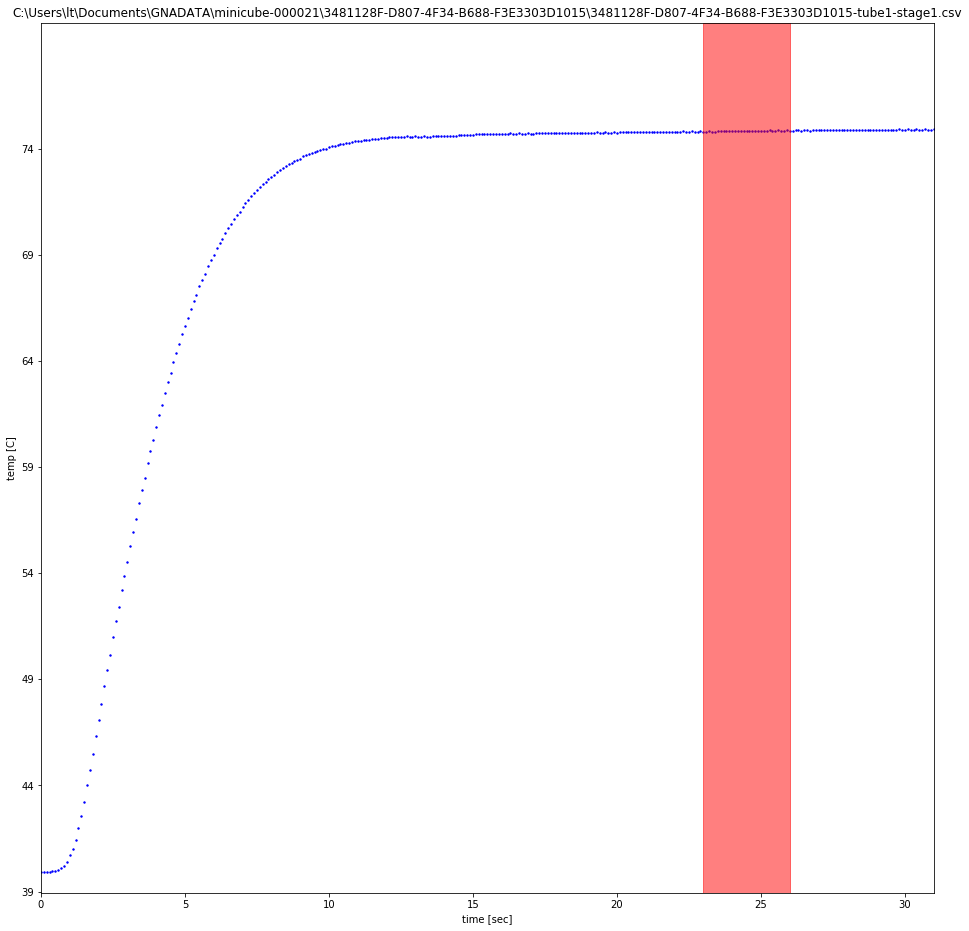

In [48]:
# Plot af et enkelt stage. y=temp, x=måling nr.
#Python style path
#full_file_path = 'C:/GNAOP/data/MCP21/7062941A-944C-4BDC-86FD-572859B0EF76/651396D3-E4F1-4C97-9F43-F129CFF5472F-tube1-stage0.csv'

# r'path is a raw string path, which can be copied directly from explorer
full_file_path = userdocpath + r'\GNADATA\minicube-000021\3481128F-D807-4F34-B688-F3E3303D1015\3481128F-D807-4F34-B688-F3E3303D1015-tube1-stage1.csv'

stage_data = np.genfromtxt(full_file_path)
yaxis_max_offset = 5
yaxis_min_offset = 1
df = pd.DataFrame(stage_data).apply (lambda x: x/100.00)
#df = pd.DataFrame(stage_data)
df['temp [C]'] = df.iloc[:, 0]
df['time [sec]'] = df.index
df['time [sec]'] = df['time [sec]'].apply (lambda x: x/10.00)
df['time [sec]'] = df['time [sec]']
ax = df.plot(kind='scatter', x='time [sec]', y='temp [C]', s=2, color='Blue', figsize=(16, 16), sharex=False, style='.', xlim=[0,max(df['time [sec]'])], ylim=[(min(stage_data)/100)-yaxis_min_offset, (max(stage_data)/100)+yaxis_max_offset], legend=False, title=full_file_path)
ax.set_xticks(np.arange(0,max(df['time [sec]']),5));
ax.set_yticks(np.arange(int(min(df['temp [C]'])),max(df['temp [C]']),5));
#wm = plt.get_current_fig_manager()
#wm.window.state('iconic')

#Descriptive Statics Cursor Settings, output below the graph
#Setting CURSOR_HIGH to 100 will offset the stat range 100 rows from the max row count. The CURSOR_LOW is a further offset.
CURSOR_HIGH = len(df['temp [C]']) - 50
CURSOR_LOW = CURSOR_HIGH - 25

plt.axvspan(CURSOR_LOW/10, CURSOR_HIGH/10, color='red', alpha=0.5)

plt.show()

<div class="alert alert-warning" role="alert">
  <strong>DESCRIPTIVE STAT OF STEADY STATE</strong> See settings of the CURSOR_HIGH and CURSOR_LOW above
</div>

In [38]:
df['temp [C]'].iloc[CURSOR_LOW: CURSOR_HIGH].describe()

count    25.000000
mean     74.830400
std       0.013064
min      74.810000
25%      74.820000
50%      74.830000
75%      74.840000
max      74.860000
Name: temp [C], dtype: float64

In [39]:
#Find Standard Error of the Mean which is a closer value to the variation in the liquid water in the tubes
from scipy import stats

SEM = stats.sem(df['temp [C]'].iloc[CURSOR_LOW: CURSOR_HIGH])

print("The standard error of the mean : {:0.4f} °C".format(SEM))
print("The standard error of the mean : {:0.1f} milli-Kelvin".format(SEM*1000))

The standard error of the mean : 0.0026 °C
The standard error of the mean : 2.6 milli-Kelvin


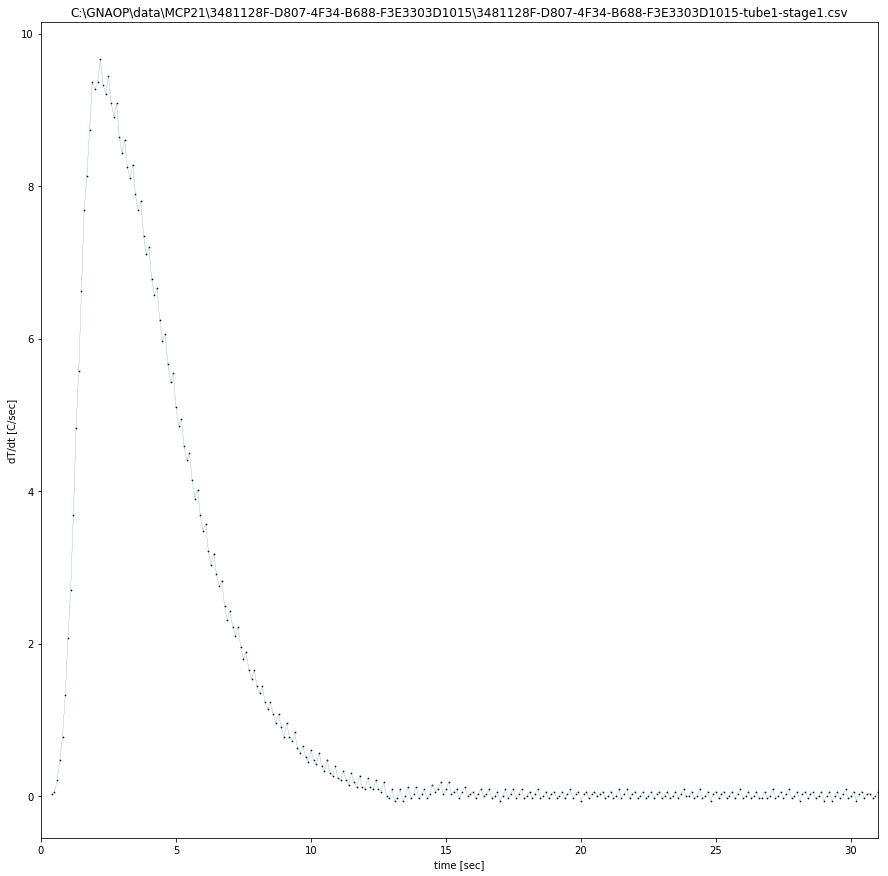

In [40]:
#df['time [sec]'] = df['time [sec]'].apply (lambda x: x/10.00)
df['dT/dt [C/sec]'] = df['temp [C]'].diff(4).apply (lambda x: x*3)
ax=df.plot(kind='scatter', x='time [sec]', y='dT/dt [C/sec]', s=0.5, color='Black', figsize=(15, 15), legend=False, title=full_file_path)
df.plot.line(x='time [sec]', y='dT/dt [C/sec]', ax=ax, linewidth=0.2, style='',legend=False);
#df.iloc[:,0].diff().plot(figsize=(12, 12), sharex=False, style='.', legend=False, title=full_file_path);

In [41]:
#Find Peak
a=np.nanmax(df['dT/dt [C/sec]'])
print("The maximum rate of heating is : {:0.2f} °C/sec".format(a[0]))

b= np.mean(df['dT/dt [C/sec]'])
print("The average rate of heating is : {:0.2f} °C/sec".format(b))

The maximum rate of heating is : 9.66 °C/sec
The average rate of heating is : 1.37 °C/sec
